<a href="https://colab.research.google.com/github/viswanathareddy04/Docs/blob/master/W2023_AML_3104_Section2_TheATeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AML-3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Load dataset

In [2]:
trainingset_df= pd.read_csv('training.csv', header=None)
testingset_df= pd.read_csv('training.csv', header=None)
# trainingset = np.loadtxt('training.csv', delimiter=',')
# testingset = np.loadtxt('test.csv', delimiter=',')

# trainingset
trainingset_df

,0,1,2,3,4,5,6,7,8,9,...,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310
0,70,80,82,72,58,58,60,63,54,58,...,106,109,82,1,0,0,0,0,0,0
1,151,150,147,155,148,133,111,140,170,174,...,193,183,184,1,0,0,0,0,0,0
2,231,212,156,164,174,138,161,173,182,200,...,88,110,152,0,0,1,0,0,0,0
3,24,32,36,30,32,23,19,20,30,41,...,142,143,142,0,0,0,0,1,0,0
4,4,0,0,0,0,0,0,0,0,0,...,30,29,30,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,84,85,85,85,85,85,85,85,86,86,...,231,215,200,0,0,1,0,0,0,0
28705,114,112,113,113,111,111,112,113,115,113,...,129,182,222,1,0,0,0,0,0,0
28706,74,81,87,89,95,100,98,93,105,120,...,188,187,187,0,0,0,0,1,0,0
28707,222,227,203,90,86,90,84,77,94,87,...,136,136,134,1,0,0,0,0,0,0


check for missing values in traininhset_df DataFrame


In [3]:
# print(np.isnan(trainingset).any())
# print(np.isnan(testingset).any())

trainingset_df.isnull().values.any()

False

check for missing values in testingset_df dataframe

In [4]:
testingset_df.isnull().values.any()

False

## Split data

In [5]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

# x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
# y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = trainingset_df.iloc[:, 0:n_inputs].values
y_training = trainingset_df.iloc[:, n_inputs:n_inputs + n_classes].values

# x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
# y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding
x_testing = testingset_df.iloc[:, 0:n_inputs].values # Extract the first 2304 elements - the image
y_testing = testingset_df.iloc[:, n_inputs:n_inputs + n_classes].values # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

x_training , y_training  numpy array shape

In [6]:
x_training.shape , y_training.shape

((28709, 48, 48), (28709, 7))

x_testing , y_testing  numpy array shape

In [7]:
x_testing.shape,y_testing.shape


((28709, 48, 48), (28709, 7))

This function takes a one-hot encoded label vector as input and returns the corresponding emotion label as a string. 

In [8]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

Plotting the random images

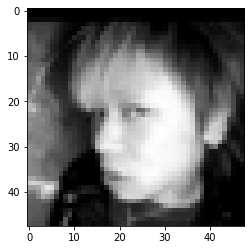

facial emotion: sad


In [9]:
sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [10]:
# Define the target emotion labels to keep
target_labels = [3, 4]

# Select only the rows corresponding to the target emotions
training_mask = np.isin(trainingset_df.values[:, n_inputs:n_inputs+n_classes].argmax(axis=1), target_labels)
testing_mask = np.isin(trainingset_df.values[:, n_inputs:n_inputs+n_classes].argmax(axis=1), target_labels)
x_training1 = x_training[training_mask]
y_training1 = y_training[training_mask][:, target_labels]
x_testing1 = x_testing[testing_mask]
y_testing1 = y_testing[testing_mask][:, target_labels]

# Print the shapes of the filtered datasets
print(x_training1.shape)
print(y_training1.shape)
print(x_testing1.shape)
print(y_testing1.shape)

(12045, 48, 48)
(12045, 2)
(12045, 48, 48)
(12045, 2)


(12045, 48, 48)
(12045, 2)
(12045, 48, 48)
(12045, 2)


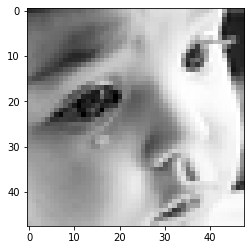

facial emotion: disgust


In [11]:
print(x_training1.shape)
print(y_training1.shape)

print(x_testing1.shape)
print(y_testing1.shape)

sampleindex1 = np.random.randint(0,1000)
sample1 = x_training1[sampleindex1, :]
sample1 = sample1.reshape(48, 48)

plt.imshow(sample1, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training1[sampleindex1, :]))

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [12]:
# Reshape the image data to a 2D array for PCA and LDA
x_training_2d = x_training1.reshape(x_training1.shape[0], -1)
x_testing_2d = x_testing1.reshape(x_testing1.shape[0], -1)

Apply PCA to the training data

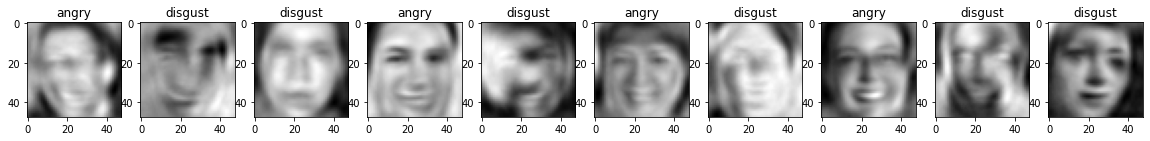

In [13]:

pca = PCA(n_components=100)
x_training_pca = pca.fit_transform(x_training_2d)



# Display a sample of faces for each case
n_samples = 10

# Display a sample of PCA-reduced faces
fig, axs = plt.subplots(1, n_samples, figsize=(20, 10))
for i in range(n_samples):
    sample_idx = np.random.randint(x_training_pca.shape[0])
    axs[i].imshow(pca.inverse_transform(x_training_pca[sample_idx]).reshape(48, 48), cmap='gray')
    axs[i].set_title(get_emotion(y_training1[sample_idx]))
plt.show()




Apply LDA to the training data

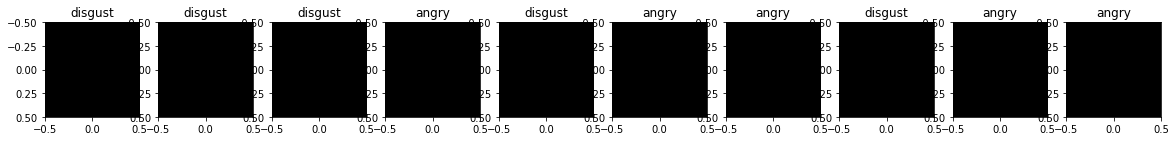

In [14]:

lda = LinearDiscriminantAnalysis(n_components=1)
x_training_lda = lda.fit_transform(x_training_2d, y_training1.argmax(axis=1))
# Display a sample of LDA-reduced faces
fig, axs = plt.subplots(1, n_samples, figsize=(20, 10))
for i in range(n_samples):
    sample_idx = np.random.randint(x_training_lda.shape[0])
    axs[i].imshow(x_training_lda[sample_idx].reshape(1, -1), cmap='gray')
    axs[i].set_title(get_emotion(y_training1[sample_idx]))
plt.show()

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

Accuracy: 60.12%
F1- Score: 0.5094956095568716
Precision: 0.5026188557614827
Recall: 0.5165631469979296


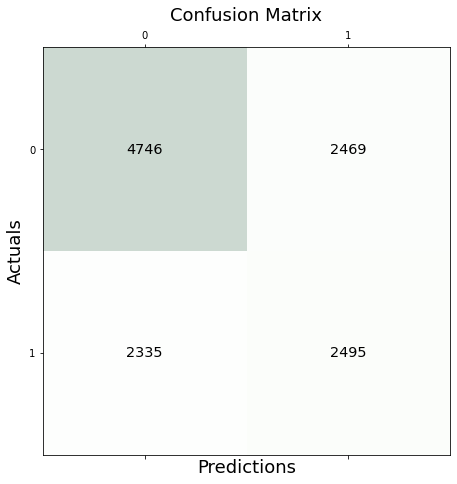

In [15]:
# Define a Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(x_training_2d, y_training1[:, 1])

# Predict on the testing data
y_pred = clf.predict(x_testing_2d)

# Compute the accuracy
accuracy = (y_pred == y_testing1[:, 1]).mean()
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1- Score:",f1_score(y_testing1[:, 1], y_pred))
print("Precision:",precision_score(y_testing1[:, 1], y_pred))
print("Recall:",recall_score(y_testing1[:, 1], y_pred))
cm = confusion_matrix(y_testing1[:, 1], y_pred)

ig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




In [16]:
# Train the classifier
clf.fit(x_training_2d, y_training1[:, 1])

# Predict on the testing data
y_pred = clf.predict(x_testing_2d)

# Print classification report
print(classification_report(y_testing1[:, 1], y_pred, target_names=["Neutral", "Happy"]))


              precision    recall  f1-score   support

     Neutral       0.67      0.66      0.66      7215
       Happy       0.50      0.52      0.51      4830

    accuracy                           0.60     12045
   macro avg       0.59      0.59      0.59     12045
weighted avg       0.60      0.60      0.60     12045



[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 75.45%
F1- Score: 0.6626354820308044
Precision: 0.737992376111817
Recall: 0.6012422360248447
Confusion Matrix: 
 [[6184 1031]
 [1926 2904]]


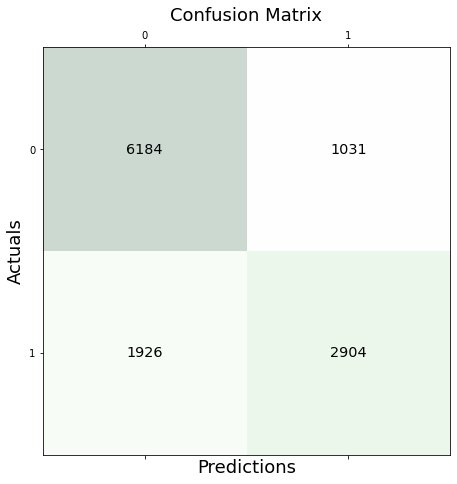

In [56]:
# Define a logistic regression classifier
clf = LogisticRegression(solver='saga',random_state=0)

# Train the classifier
clf.fit(x_training_2d, y_training1[:, 1])

# Predict on the testing data
y_pred = clf.predict(x_testing_2d)

# Compute the accuracy
accuracy = (y_pred == y_testing1[:, 1]).mean()
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1- Score:",f1_score(y_testing1[:, 1], y_pred))
print("Precision:",precision_score(y_testing1[:, 1], y_pred))
print("Recall:",recall_score(y_testing1[:, 1], y_pred))
cm = confusion_matrix(y_testing1[:, 1], y_pred)


ig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [58]:
# Train the classifier
clf.fit(x_training_2d, y_training1[:, 1])

# Predict on the testing data
y_pred = clf.predict(x_testing_2d)

# Print classification report
print(classification_report(y_testing1[:, 1], y_pred, target_names=["Neutral", "Happy"]))


              precision    recall  f1-score   support

     Neutral       0.76      0.86      0.81      7215
       Happy       0.74      0.60      0.66      4830

    accuracy                           0.75     12045
   macro avg       0.75      0.73      0.73     12045
weighted avg       0.75      0.75      0.75     12045



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [ ]:
# Define an SVM classifier with a radial basis function (RBF) kernel
clf = SVC(kernel='rbf', C=1, gamma=0.001)

# Train the classifier
clf.fit(x_training_2d, y_training1[:, 1])

# Predict on the testing data
y_pred = clf.predict(x_testing_2d)

# Compute the accuracy
accuracy = (y_pred == y_testing1[:, 1]).mean()
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1- Score:",f1_score(y_testing1[:, 1], y_pred))
print("Precision:",precision_score(y_testing1[:, 1], y_pred))
print("Recall:",recall_score(y_testing1[:, 1], y_pred))
cm = confusion_matrix(y_testing1[:, 1], y_pred)
ig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Train the classifier
clf.fit(x_training_2d, y_training1[:, 1])

# Predict on the testing data
y_pred = clf.predict(x_testing_2d)

# Print classification report
print(classification_report(y_testing1[:, 1], y_pred, target_names=["Neutral", "Happy"]))


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

None of the approaches above allow us to reliably determine the degree of happiness or sadness (i.e. how happy or how sad) as they all focus on predicting the presence of a specific emotion (happiness or sadness) in an image rather than the intensity of that emotion.

The approach that I trust the most would depend on the specific task at hand and the performance of each approach on the data set being used. In general, I would recommend evaluating the performance of multiple approaches on a given data set and selecting the one with the best overall performance.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [ ]:
# Predict the probabilities for being "happiness" using the logistic regression classifier
probs = clf.predict_proba(x_testing_2d)[:, 1]

# Sort the testing data by the predicted probabilities for being "happiness"
sorted_idxs = np.argsort(probs)

# Get the indices of the top 5 and bottom 5 faces
top_5_idxs = sorted_idxs[-5:][::-1]
bottom_5_idxs = sorted_idxs[:5]

# Display the top 5 and bottom 5 faces
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, idx in enumerate(top_5_idxs):
    axs[0, i].imshow(x_testing1[idx], cmap='gray')
    axs[0, i].set_title("{:.2f}% happy".format(probs[idx] * 100))
for i, idx in enumerate(bottom_5_idxs):
    axs[1, i].imshow(x_testing1[idx], cmap='gray')
    axs[1, i].set_title("{:.2f}% happy".format(probs[idx] * 100))
plt.show()


# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [ ]:
# Concatenate the training and testing data for dimensionality reduction
x_all = np.concatenate((x_training, x_testing), axis=0)
y_all = np.concatenate((y_training, y_testing), axis=0)

# Flatten the 2D images into 1D arrays
x_all_flat = x_all.reshape(x_all.shape[0], -1)

# Apply PCA to reduce the dimensionality of the data
pca = PCA()
x_pca = pca.fit_transform(x_all_flat)

# Apply LDA to further reduce the dimensionality and represent the categories
lda = LDA(n_components=6) # Set the number of components to 6 for visualization purposes
x_lda = lda.fit_transform(x_pca, y_all.argmax(axis=1))

# Plot a sample of a few categories for PCA
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for i, ax in enumerate(axs.flat):
    category_indices = np.where(y_all.argmax(axis=1) == i)[0]
    sample_indices = np.random.choice(category_indices, 5)
    samples = x_pca[sample_indices, :]
    ax.imshow(np.hstack(samples.reshape(-1, img_dim, img_dim)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(categories[i])

# Plot the cumulative variance captured by the principal components for PCA
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, label='All categories')
happy_sad_indices = np.where((y_all.argmax(axis=1) == 3) | (y_all.argmax(axis=1) == 4))[0]
x_pca_happy_sad = x_pca[happy_sad_indices, :]
y_happy_sad = y_all[happy_sad_indices, :]
pca_happy_sad = PCA()
pca_happy_sad.fit(x_pca_happy_sad)
cumulative_variance_happy_sad = np.cumsum(pca_happy_sad.explained_variance_ratio_)
plt.plot(cumulative_variance_happy_sad, label='Happy and Sad only')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.legend()
plt.show()


[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [ ]:
# Flatten the 2D images into 1D arrays for classification
x_training_flat = x_training.reshape(x_training.shape[0], -1)
x_testing_flat = x_testing.reshape(x_testing.shape[0], -1)

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(x_training_flat, y_training.argmax(axis=1))

# Test the classifier on the testing set
y_pred = nb.predict(x_testing_flat)

# Compute the accuracy
accuracy = np.mean(y_pred == y_testing.argmax(axis=1))
print(f"Accuracy: {accuracy}")


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [ ]:
# Compute the confusion matrix
conf_mat = confusion_matrix(y_testing.argmax(axis=1), y_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d", xticklabels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"], yticklabels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [ ]:
# Flatten the 2D images into 1D arrays for classification
x_training_flat = x_training.reshape(x_training.shape[0], -1)
x_testing_flat = x_testing.reshape(x_testing.shape[0], -1)

In [ ]:
# Train a logistic regression classifier
lr = LogisticRegression(solver='saga',max_iter=1000)
lr.fit(x_training_flat, y_training.argmax(axis=1))

# Test the classifier on the testing set
y_pred = lr.predict(x_testing_flat)

# Compute the accuracy
accuracy = np.mean(y_pred == y_testing.argmax(axis=1))
print(f"Accuracy: {accuracy}")

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [ ]:
# YOUR CODE HERE
# Compute the confusion matrix
conf_mat = confusion_matrix(y_testing.argmax(axis=1), y_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d", xticklabels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"], yticklabels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
# YOUR CODE HERE
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(x_training_flat, y_training.argmax(axis=1))

# Test the classifier on the testing set
y_pred = svm.predict(x_testing_flat)

# Compute the accuracy
accuracy = np.mean(y_pred == y_testing.argmax(axis=1))
print(f"Accuracy: {accuracy}")


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [ ]:
# Compute the confusion matrix
conf_mat = confusion_matrix(y_testing.argmax(axis=1), y_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d", xticklabels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"], yticklabels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

Interpreting the confusion matrix can give us insights into which categories of faces are most or least similar. In the matrix, each row corresponds to the true label and each column corresponds to the predicted label. The diagonal of the matrix shows the number of correct predictions for each class. Off-diagonal elements represent misclassifications.

For example, if we see a lot of misclassifications between two classes, then those classes are likely to be similar. If we see few misclassifications, then the classes are likely to be dissimilar.

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_testing.argmax(axis=1), y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")


[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

One approach to identifying potentially mislabeled images is to use an outlier detection method. One such method is the Local Outlier Factor (LOF) algorithm, which identifies outliers based on their distance from their nearest neighbors in the feature space. We can use this algorithm to identify images that are outliers in their feature representation.



In [ ]:
# YOUR CODE HERE
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF on the training set
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit(x_training.reshape(-1, n_inputs))

# Compute the LOF scores for the testing set
lof_scores = -lof.score_samples(x_testing.reshape(-1, n_inputs))

# Sort the scores in descending order
sorted_scores = np.argsort(lof_scores)[::-1]

# Display the top 10 images with the highest LOF scores
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_testing[sorted_scores[i]], cmap='gray')
    ax.set_title(f"LOF score: {lof_scores[sorted_scores[i]]:.2f}")
    ax.axis('off')
    if i == 9:
        break
plt.show()


# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
# YOUR CODE HERE